JACOB'S FIRE EXPLORATION

# Import Librariews

In [10]:
import pandas as pd
import numpy as np

# Import Data

In [11]:
# COLO ANNUAL FIRE COUNT #
df = pd.read_csv('Month_Reg_CO.txt', header=1).drop(columns='area')
df.columns = df.columns.str.replace(' ', '')
df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2003,13,12,92,66,44,13,255,29,92,89,12.0,7.0
1,2004,10,7,180,75,87,73,65,32,84,29,9.0,26.0
2,2005,11,43,107,95,122,30,172,30,54,41,43.0,20.0
3,2006,45,54,75,153,46,110,47,5,24,9,48.0,4.0
4,2007,6,4,58,89,59,60,30,26,75,121,100.0,17.0


In [12]:
df.columns[1:]

Index(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec'],
      dtype='object')

# I. Wrangling: Melt DataFrame

In [13]:
df_melt = pd.melt(df, id_vars=['year'], value_vars=df.columns[1:], var_name='month')
df_melt['date'] = df_melt['year'].astype(str)+'-'+df_melt['month']+'-1'

In [14]:
df_melt.head()

,year,month,value,date
0,2003,jan,13.0,2003-jan-1
1,2004,jan,10.0,2004-jan-1
2,2005,jan,11.0,2005-jan-1
3,2006,jan,45.0,2006-jan-1
4,2007,jan,6.0,2007-jan-1


In [15]:
df_melt = df_melt.set_index(pd.to_datetime(df_melt['date'], format='%Y-%b-%d'))
df_melt = df_melt.drop(columns=['year', 'month', 'date']).sort_index()

In [16]:
df_melt.head()

,value
date,
2003-01-01,13.0
2003-02-01,12.0
2003-03-01,92.0
2003-04-01,66.0
2003-05-01,44.0


# II. Feature Engineering

Use `shift` to create a target and additional features

In [17]:
df_melt['target'] = df_melt.shift(-1)
df_melt['previous_month'] = df_melt['value'].shift(1)
df_melt['month'] = df_melt.index.month

# Clean up DataFrame
df_melt.columns = ['fire_count', 'target_fire_count', 'previous_month_count', 'month']
df_melt = df_melt[['month', 'previous_month_count', 'fire_count', 'target_fire_count']]
df_melt.dropna(inplace=True)

In [18]:
df_melt.head()

,month,previous_month_count,fire_count,target_fire_count
date,,,,
2003-02-01,2,13.0,12.0,92.0
2003-03-01,3,12.0,92.0,66.0
2003-04-01,4,92.0,66.0,44.0
2003-05-01,5,66.0,44.0,13.0
2003-06-01,6,44.0,13.0,255.0


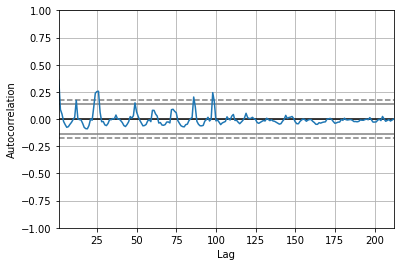

In [21]:
pd.plotting.autocorrelation_plot(df_melt['fire_count']);

This autocorrelation plot suggests that there's not a big correlation between the fire count for one month and the next. However, there does seem to be some sort of seasonality. Perhaps including the fire reading from the same month for the previous year would help.